In [1]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
df_g = pd.read_csv('stat_g.csv')
df_r = pd.read_csv('stat_r.csv')
df_i = pd.read_csv('stat_i.csv')
df_z = pd.read_csv('stat_z.csv')
df_Y = pd.read_csv('stat_Y.csv')

Band by band, histograms

# r-band

r-band histogram

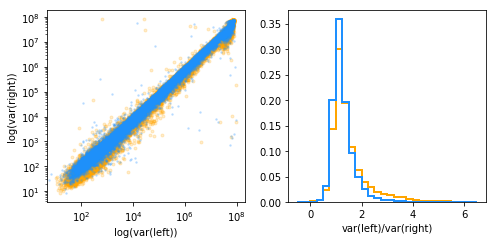

In [3]:
tmp_r = df_r.loc[df_r['type'] == 'circ']
tmp_r_left41 = tmp_r.loc[(tmp_r['ccdnum'] == 41) & (tmp_r['LR'] == 'L')]
tmp_r_right41 = tmp_r.loc[(tmp_r['ccdnum'] == 41) & (tmp_r['LR'] == 'R')]
tmp_r_left28 = tmp_r.loc[(tmp_r['ccdnum'] == 28) & (tmp_r['LR'] == 'L')]
tmp_r_right28 = tmp_r.loc[(tmp_r['ccdnum'] == 28) & (tmp_r['LR'] == 'R')]
#
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))
ax[0].scatter(tmp_r_left41['var'], tmp_r_right41['var'], 
              marker='.', c='orange', alpha=0.2)
ax[0].scatter(tmp_r_left28['var'], tmp_r_right28['var'], 
              marker='.', c='dodgerblue', s=10, alpha=0.2)
kw = {'lw':2, 'histtype':'step', 'range':(-0.5, 6.5), 'bins':28}
w41 = np.ones_like(tmp_r_right41['var'].values) / tmp_r_right41['var'].values.size
ax[1].hist(tmp_r_left41['var'].values / tmp_r_right41['var'].values, 
           color='orange', weights=w41, **kw)
w28 = np.ones_like(tmp_r_right28['var'].values) / tmp_r_right28['var'].values.size
ax[1].hist(tmp_r_left28['var'].values / tmp_r_right28['var'].values, 
           color='dodgerblue', weights=w28, **kw)
ax[0].set_xlabel('log(var(left))')
ax[0].set_ylabel('log(var(right))')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[1].set_xlabel('var(left)/var(right)')
plt.tight_layout()

r-band get exposure numbers

In [4]:
aux_r = df_r.loc[(df_r['ccdnum'] == 41) & (df_r['type'] == 'circ')]
expnum_r = aux_r['expnum'].unique()
sel_r = []
t0 = time.time()
for e in expnum_r:
    df1 = aux_r.loc[aux_r['expnum'] == e]
    obj = df1['number'].unique()
    for n in obj:
        df2 = df1.loc[df1['number'] == n]
        if (len(df2.index) != 2):
            df2 = df2[:2]
        # Do the L/R ratio
        ratio = df2.loc[df2['LR'] == 'L', 'var'].values 
        ratio /= df2.loc[df2['LR'] == 'R', 'var'].values
        if (ratio.size != 1):
            print('ERROR', ratio)
        else:
            sel_r.append([e, ratio[0]])
t1 = time.time()
res_r = pd.DataFrame(sel_r, columns=['expnum', 'ratio_var'])
print('{0:.2f} min for {1} exposures, {2} objects'.format((t1 - t0) / 60., 
                                                          expnum_r.size, 
                                                          len(aux_r) / 2.))

0.70 min for 658 exposures, 32668.0 objects


r-band cut value

In [5]:
cutval_r = 2.3 #2.45

r-band group and get mean ratio per exposure. Print some exposures to ds9 them

In [6]:
ratio_r = res_r.groupby(by='expnum').mean()
#
exclude_r = ratio_r.loc[ratio_r['ratio_var'] > cutval_r]
print(len(df_r['expnum'].unique()), len(exclude_r.index), 
      '\n', exclude_r.sort_values('ratio_var')[:10])

659 104 
         ratio_var
expnum           
771588   2.324291
771196   2.492882
772037   2.506389
771525   2.515681
791297   2.516442
772015   2.573572
771517   2.587702
771194   2.641714
771523   2.655793
771600   2.665683


Histogram to check distribution adn see if cutval is appropiate

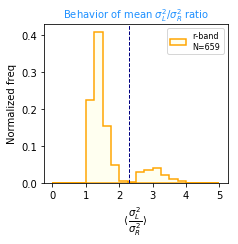

In [7]:
fig, ax = plt.subplots(figsize=(3.5, 3.5))
w = np.ones_like(ratio_r['ratio_var'].values) / len(ratio_r['ratio_var'].index)
ax.hist(ratio_r['ratio_var'], 
        edgecolor='orange', 
        range=(0, 5), bins=20, weights=w,
        histtype='stepfilled',
        lw=1.5, facecolor='ivory', 
        label='r-band\nN={0}'.format(len(df_r['expnum'].unique())))
ax.axvline(cutval_r, linestyle='--', color='navy', linewidth=1)
plt.legend(fontsize=8)
ax.set_xlabel(r'$\langle\, \dfrac{\sigma^{2}_{L}}{\sigma^{2}_{R}}\, \rangle$')
ax.set_ylabel('Normalized freq')
ax.set_title(r'Behavior of mean ${\sigma^{2}_{L}}/{\sigma^{2}_{R}}$ ratio', 
             fontsize=10, color='dodgerblue')
plt.tight_layout()
plt.savefig('ratio_var_rband.png', format='png', dpi=300)

In [8]:
aux_nite_r = df_r.loc[df_r['expnum'].isin(exclude_r.index), 'nite'].unique()
print('Excluded {0} exposures from {1} nights: {2}'.format(len(exclude_r.index),
                                                           len(aux_nite_r), 
                                                           ','.join(map(str, aux_nite_r))))

Excluded 104 exposures from 13 nights: 20180908,20180914,20180909,20180910,20180913,20180917,20181019,20181027,20181105,20181106,20181108,20181114,20181116


Write out the expoxures to be excluded

In [9]:
outname_r = 'exclude_r_expnum.csv'
np.savetxt(outname_r, exclude_r.index, fmt='%d')

----------------------------------------

# g-band

g-band histogram

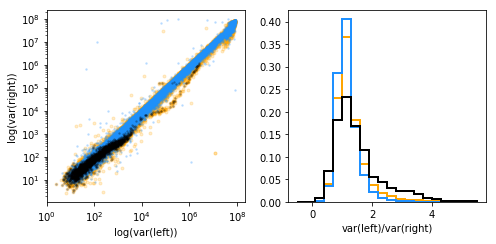

In [10]:
tmp_g = df_g.loc[df_g['type'] == 'circ']
tmp_g_left41 = tmp_g.loc[(tmp_g['ccdnum'] == 41) & (tmp_g['LR'] == 'L')]
tmp_g_right41 = tmp_g.loc[(tmp_g['ccdnum'] == 41) & (tmp_g['LR'] == 'R')]
tmp_g_left28 = tmp_g.loc[(tmp_g['ccdnum'] == 28) & (tmp_g['LR'] == 'L')]
tmp_g_right28 = tmp_g.loc[(tmp_g['ccdnum'] == 28) & (tmp_g['LR'] == 'R')]
#
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))
ax[0].scatter(tmp_g_left41['var'], tmp_g_right41['var'], 
              marker='.', c='orange', alpha=0.2)
ax[0].scatter(tmp_g_left28['var'], tmp_g_right28['var'], 
              marker='.', c='dodgerblue', s=10, alpha=0.2)
# 20180909
ax[0].scatter(tmp_g_left41.loc[tmp_g_left41['nite'] == 20180909, 'var'], 
              tmp_g_right41.loc[tmp_g_right41['nite'] == 20180909, 'var'], 
              s=10, marker='.', c='k', alpha=0.2)
#
kw = {'lw':2, 'histtype':'step', 'bins':20, 'range':(-0.5, 5.5),} 
w41 = np.ones_like(tmp_g_right41['var'].values) / tmp_g_right41['var'].values.size
ax[1].hist(tmp_g_left41['var'].values / tmp_g_right41['var'].values, 
           color='orange', weights=w41, **kw)
w28 = np.ones_like(tmp_g_right28['var'].values) / tmp_g_right28['var'].values.size
ax[1].hist(tmp_g_left28['var'].values / tmp_g_right28['var'].values, 
           color='dodgerblue', weights=w28, **kw)
# 20180909 for CCD 41
w0909 = np.ones_like(tmp_g_left41.loc[tmp_g_left41['nite'] == 20180909, 'var'].values)
w0909 /= tmp_g_left41.loc[tmp_g_left41['nite'] == 20180909, 'var'].values.size
ax[1].hist(tmp_g_left41.loc[tmp_g_left41['nite'] == 20180909, 'var'].values / tmp_g_right41.loc[tmp_g_right41['nite'] == 20180909, 'var'].values,
           color='k', weights=w0909, **kw)
ax[0].set_xlabel('log(var(left))')
ax[0].set_ylabel('log(var(right))')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[1].set_xlabel('var(left)/var(right)')
plt.tight_layout()

In [11]:
tmp_g_left41.loc[tmp_g_left41['nite'] == 20180909, 'var'].values.size

2418

discard entries around 20180909

In [12]:
df_g = df_g.loc[df_g['nite'] != 20180909]

In [13]:
df_g['nite'].unique()

array([20180908, 20180910, 20180914, 20180915, 20180916, 20180912,
       20180913, 20180917, 20180918, 20180920, 20180928, 20180930,
       20181009, 20181017, 20181018, 20181019, 20181020, 20181026,
       20181027, 20181105, 20181106, 20181107, 20181108, 20181114,
       20181115, 20181116, 20181117])

g-band get exposure numbers

In [14]:
aux_g = df_g.loc[(df_g['ccdnum'] == 41) & (df_g['type'] == 'circ')]
expnum_g = aux_g['expnum'].unique()
sel_g = []
t0 = time.time()
for e in expnum_g:
    df1 = aux_g.loc[aux_g['expnum'] == e]
    obj = df1['number'].unique()
    for n in obj:
        df2 = df1.loc[df1['number'] == n]
        if (len(df2.index) != 2):
            df2 = df2[:2]
        # Do the L/R ratio
        ratio = df2.loc[df2['LR'] == 'L', 'var'].values 
        ratio /= df2.loc[df2['LR'] == 'R', 'var'].values
        if (ratio.size != 1):
            print('ERROR', ratio)
        else:
            sel_g.append([e, ratio[0]])
t1 = time.time()
res_g = pd.DataFrame(sel_g, columns=['expnum', 'ratio_var'])
print('{0:.2f} min for {1} exposures, {2} objects'.format((t1 - t0) / 60., 
                                                          expnum_g.size, 
                                                          len(aux_g) / 2.))

0.62 min for 700 exposures, 29867.0 objects


g-band cut value

In [15]:
cutval_g = 1.5

g-band group and get mean ratio per exposure. Print some exposures to ds9 them

In [16]:
ratio_g = res_g.groupby(by='expnum').mean()
#
exclude_g = ratio_g.loc[ratio_g['ratio_var'] > cutval_g]
print(len(df_g['expnum'].unique()), len(exclude_g.index), 
      '\n', exclude_g.sort_values('ratio_var')[:10])

704 115 
         ratio_var
expnum           
792435   1.501239
791322   1.501243
772008   1.501602
788071   1.501845
782090   1.502271
771193   1.505692
788069   1.506765
788082   1.510065
774717   1.510921
771131   1.516764


Histogram to check distribution adn see if cutval is appropiate

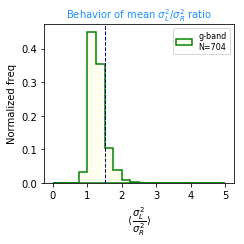

In [17]:
fig, ax = plt.subplots(figsize=(3.5, 3.5))
w = np.ones_like(ratio_g['ratio_var'].values) / len(ratio_g['ratio_var'].index)
ax.hist(ratio_g['ratio_var'], 
        edgecolor='green', 
        range=(0, 5), bins=20, weights=w,
        histtype='stepfilled',
        lw=1.5, facecolor='ivory', 
        label='g-band\nN={0}'.format(len(df_g['expnum'].unique())))
ax.axvline(cutval_g, linestyle='--', color='navy', linewidth=1)
plt.legend(fontsize=8)
ax.set_xlabel(r'$\langle\, \dfrac{\sigma^{2}_{L}}{\sigma^{2}_{R}}\, \rangle$')
ax.set_ylabel('Normalized freq')
ax.set_title(r'Behavior of mean ${\sigma^{2}_{L}}/{\sigma^{2}_{R}}$ ratio', 
             fontsize=10, color='dodgerblue')
plt.tight_layout()
plt.savefig('ratio_var_gband.png', format='png', dpi=300)

For g-band I need additional assessment, plot var(L) versus var(R)

In [18]:
g_var_left = tmp_g_left41[['expnum', 'var']].groupby(by=['expnum']).std()
g_var_right = tmp_g_left41[['expnum', 'var']].groupby(by=['expnum']).std()
g_var_left[:4], g_var_right[:4]

(                 var
 expnum              
 771094  6.295259e+06
 771096  1.326416e+07
 771098  1.287321e+07
 771099  9.039490e+06,                  var
 expnum              
 771094  6.295259e+06
 771096  1.326416e+07
 771098  1.287321e+07
 771099  9.039490e+06)

In [19]:
aux_nite_g = df_g.loc[df_g['expnum'].isin(exclude_g.index), 'nite'].unique()
print('Excluded {0} exposures from {1} nights: {2}'.format(len(exclude_g.index),
                                                           len(aux_nite_g), 
                                                           ','.join(map(str, aux_nite_g))))

Excluded 115 exposures from 17 nights: 20180908,20180910,20180914,20180916,20180917,20180928,20181009,20181018,20181019,20181027,20181105,20181106,20181107,20181108,20181114,20181115,20181116


Write out the expoxures to be excluded

In [20]:
outname_g = 'exclude_g_expnum.csv'
np.savetxt(outname_g, exclude_g.index, fmt='%d')

----------------------------------------

# i-band

i-band histogram

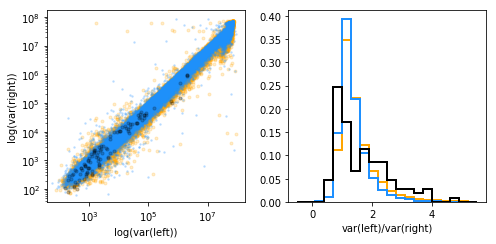

In [21]:
tmp_i = df_i.loc[df_i['type'] == 'circ']
tmp_i_left41 = tmp_i.loc[(tmp_i['ccdnum'] == 41) & (tmp_i['LR'] == 'L')]
tmp_i_right41 = tmp_i.loc[(tmp_i['ccdnum'] == 41) & (tmp_i['LR'] == 'R')]
tmp_i_left28 = tmp_i.loc[(tmp_i['ccdnum'] == 28) & (tmp_i['LR'] == 'L')]
tmp_i_right28 = tmp_i.loc[(tmp_i['ccdnum'] == 28) & (tmp_i['LR'] == 'R')]
#
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))
ax[0].scatter(tmp_i_left41['var'], tmp_i_right41['var'], 
              marker='.', c='orange', alpha=0.2)
ax[0].scatter(tmp_i_left28['var'], tmp_i_right28['var'], 
              marker='.', c='dodgerblue', s=10, alpha=0.2)
# 20180909
ax[0].scatter(tmp_i_left41.loc[tmp_i_left41['nite'] == 20180909, 'var'], 
              tmp_i_right41.loc[tmp_i_right41['nite'] == 20180909, 'var'], 
              s=40, marker='.', c='k', alpha=0.2)
#
kw = {'lw':2, 'histtype':'step', 'bins':20, 'range':(-0.5, 5.5),} 
w41 = np.ones_like(tmp_i_right41['var'].values) / tmp_i_right41['var'].values.size
ax[1].hist(tmp_i_left41['var'].values / tmp_i_right41['var'].values, 
           color='orange', weights=w41, **kw)
w28 = np.ones_like(tmp_i_right28['var'].values) / tmp_i_right28['var'].values.size
ax[1].hist(tmp_i_left28['var'].values / tmp_i_right28['var'].values, 
           color='dodgerblue', weights=w28, **kw)
# 20180909 for CCD 41
w0909 = np.ones_like(tmp_i_left41.loc[tmp_i_left41['nite'] == 20180909, 'var'].values)
w0909 /= tmp_i_left41.loc[tmp_i_left41['nite'] == 20180909, 'var'].values.size
ax[1].hist(tmp_i_left41.loc[tmp_i_left41['nite'] == 20180909, 'var'].values / tmp_i_right41.loc[tmp_i_right41['nite'] == 20180909, 'var'].values,
           color='k', weights=w0909, **kw)
ax[0].set_xlabel('log(var(left))')
ax[0].set_ylabel('log(var(right))')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[1].set_xlabel('var(left)/var(right)')
plt.tight_layout()

discard entries around 20180909

In [22]:
df_i = df_i.loc[df_i['nite'] != 20180909]

In [23]:
df_i['nite'].unique()

array([20180908, 20180910, 20180914, 20180916, 20180912, 20180913,
       20180915, 20180918, 20180920, 20180921, 20180928, 20180930,
       20181009, 20181017, 20181018, 20181019, 20181020, 20181026,
       20181027, 20181105, 20181106, 20181107, 20181108, 20181114,
       20181115, 20181116, 20181117])

i-band get exposure numbers

In [24]:
aux_i = df_i.loc[(df_i['ccdnum'] == 41) & (df_i['type'] == 'circ')]
expnum_i = aux_i['expnum'].unique()
sel_i = []
t0 = time.time()
for e in expnum_i:
    df1 = aux_i.loc[aux_i['expnum'] == e]
    obj = df1['number'].unique()
    for n in obj:
        df2 = df1.loc[df1['number'] == n]
        if (len(df2.index) != 2):
            df2 = df2[:2]
        # Do the L/R ratio
        ratio = df2.loc[df2['LR'] == 'L', 'var'].values 
        ratio /= df2.loc[df2['LR'] == 'R', 'var'].values
        if (ratio.size != 1):
            print('ERROR', ratio)
        else:
            sel_i.append([e, ratio[0]])
t1 = time.time()
res_i = pd.DataFrame(sel_i, columns=['expnum', 'ratio_var'])
print('{0:.2f} min for {1} exposures, {2} objects'.format((t1 - t0) / 60., 
                                                          expnum_i.size, 
                                                          len(aux_i) / 2.))

0.95 min for 992 exposures, 45675.0 objects


i-band cut value

In [25]:
cutval_i = 1.6

i-band group and get mean ratio per exposure. Print some exposures to ds9 them

In [26]:
ratio_i = res_i.groupby(by='expnum').mean()
#
exclude_i = ratio_i.loc[ratio_i['ratio_var'] > cutval_i]
print(len(df_i['expnum'].unique()), len(exclude_i.index), 
      '\n', exclude_i.sort_values('ratio_var')[:10])

994 338 
         ratio_var
expnum           
791626   1.600567
794073   1.600651
794405   1.603259
782104   1.604421
774795   1.604637
794578   1.604856
778733   1.604879
794022   1.605385
791973   1.606538
788092   1.606777


Histogram to check distribution adn see if cutval is appropiate

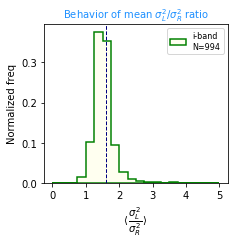

In [27]:
fig, ax = plt.subplots(figsize=(3.5, 3.5))
w = np.ones_like(ratio_i['ratio_var'].values) / len(ratio_i['ratio_var'].index)
ax.hist(ratio_i['ratio_var'], 
        edgecolor='green', 
        range=(0, 5), bins=20, weights=w,
        histtype='stepfilled',
        lw=1.5, facecolor='ivory', 
        label='i-band\nN={0}'.format(len(df_i['expnum'].unique())))
ax.axvline(cutval_i, linestyle='--', color='navy', linewidth=1)
plt.legend(fontsize=8)
ax.set_xlabel(r'$\langle\, \dfrac{\sigma^{2}_{L}}{\sigma^{2}_{R}}\, \rangle$')
ax.set_ylabel('Normalized freq')
ax.set_title(r'Behavior of mean ${\sigma^{2}_{L}}/{\sigma^{2}_{R}}$ ratio', 
             fontsize=10, color='dodgerblue')
plt.tight_layout()
plt.savefig('ratio_var_iband.png', format='png', dpi=300)

For i-band I need additional assessment, plot var(L) versus var(R)

In [28]:
i_var_left = tmp_i_left41[['expnum', 'var']].groupby(by=['expnum']).std()
i_var_right = tmp_i_left41[['expnum', 'var']].groupby(by=['expnum']).std()
i_var_left[:4], i_var_right[:4]

(                 var
 expnum              
 771101  1.170748e+07
 771106  1.064133e+07
 771107  5.987835e+06
 771111  9.815755e+06,                  var
 expnum              
 771101  1.170748e+07
 771106  1.064133e+07
 771107  5.987835e+06
 771111  9.815755e+06)

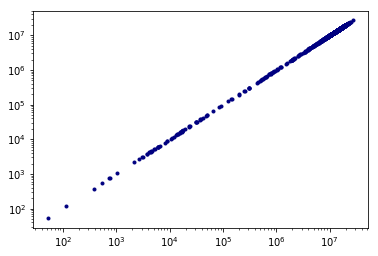

In [29]:
fig, ax = plt.subplots()
ax.scatter(i_var_left, i_var_right, marker='.', color='navy')
ax.set_xscale('log')
ax.set_yscale('log')

In [30]:
aux_nite_i = df_i.loc[df_i['expnum'].isin(exclude_i.index), 'nite'].unique()
print('Excluded {0} exposures from {1} nights: {2}'.format(len(exclude_i.index),
                                                           len(aux_nite_i), 
                                                           ','.join(map(str, aux_nite_i))))

Excluded 338 exposures from 24 nights: 20180908,20180914,20180916,20180910,20180913,20180915,20180920,20180921,20180928,20180930,20181009,20181017,20181019,20181020,20181026,20181027,20181105,20181106,20181107,20181108,20181114,20181115,20181116,20181117


Write out the expoxures to be excluded

In [31]:
outname_i = 'exclude_i_expnum.csv'
np.savetxt(outname_i, exclude_i.index, fmt='%d')

----------------------------------------

# z-band

z-band histogram

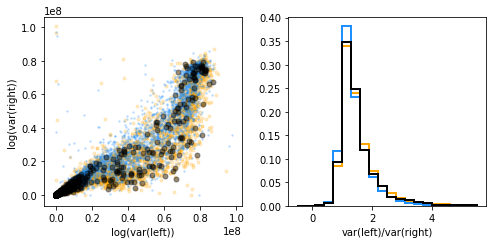

In [32]:
tmp_z = df_z.loc[df_z['type'] == 'circ']
tmp_z_left41 = tmp_z.loc[(tmp_z['ccdnum'] == 41) & (tmp_z['LR'] == 'L')]
tmp_z_right41 = tmp_z.loc[(tmp_z['ccdnum'] == 41) & (tmp_z['LR'] == 'R')]
tmp_z_left28 = tmp_z.loc[(tmp_z['ccdnum'] == 28) & (tmp_z['LR'] == 'L')]
tmp_z_right28 = tmp_z.loc[(tmp_z['ccdnum'] == 28) & (tmp_z['LR'] == 'R')]
#
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))
ax[0].scatter(tmp_z_left41['var'], tmp_z_right41['var'], 
              marker='.', c='orange', alpha=0.2)
ax[0].scatter(tmp_z_left28['var'], tmp_z_right28['var'], 
              marker='.', c='dodgerblue', s=10, alpha=0.2)
# 20181116
ax[0].scatter(tmp_z_left41.loc[tmp_z_left41['nite'] == 20181116, 'var'], 
              tmp_z_right41.loc[tmp_z_right41['nite'] == 20181116, 'var'], 
              s=100, marker='.', c='k', alpha=0.4)
#
kw = {'lw':2, 'histtype':'step', 'bins':20, 'range':(-0.5, 5.5),} 
w41 = np.ones_like(tmp_z_right41['var'].values) / tmp_z_right41['var'].values.size
ax[1].hist(tmp_z_left41['var'].values / tmp_z_right41['var'].values, 
           color='orange', weights=w41, **kw)
w28 = np.ones_like(tmp_z_right28['var'].values) / tmp_z_right28['var'].values.size
ax[1].hist(tmp_z_left28['var'].values / tmp_z_right28['var'].values, 
           color='dodgerblue', weights=w28, **kw)
# 20181116 for CCD 41
w0909 = np.ones_like(tmp_z_left41.loc[tmp_z_left41['nite'] == 20181116, 'var'].values)
w0909 /= tmp_z_left41.loc[tmp_z_left41['nite'] == 20181116, 'var'].values.size
ax[1].hist(tmp_z_left41.loc[tmp_z_left41['nite'] == 20181116, 'var'].values / tmp_z_right41.loc[tmp_z_right41['nite'] == 20181116, 'var'].values,
           color='k', weights=w0909, **kw)
ax[0].set_xlabel('log(var(left))')
ax[0].set_ylabel('log(var(right))')
#ax[0].set_xscale('log')
#ax[0].set_yscale('log')
ax[1].set_xlabel('var(left)/var(right)')
plt.tight_layout()

discard entries around 20180909

In [33]:
df_z = df_z.loc[~df_z['nite'].isin([20180908, 20180909, 20180910])]

In [34]:
df_z['nite'].unique()

array([20180912, 20180916, 20180917, 20180918, 20180920, 20180921,
       20180928, 20180930, 20181017, 20181018, 20181019, 20181020,
       20181021, 20181026, 20181027, 20181108, 20181114, 20181115,
       20181116, 20181117])

z-band get exposure numbers

In [35]:
aux_z = df_z.loc[(df_z['ccdnum'] == 41) & (df_z['type'] == 'circ')]
expnum_z = aux_z['expnum'].unique()
sel_z = []
t0 = time.time()
for e in expnum_z:
    df1 = aux_z.loc[aux_z['expnum'] == e]
    obj = df1['number'].unique()
    for n in obj:
        df2 = df1.loc[df1['number'] == n]
        if (len(df2.index) != 2):
            df2 = df2[:2]
        # Do the L/R ratio
        ratio = df2.loc[df2['LR'] == 'L', 'var'].values 
        ratio /= df2.loc[df2['LR'] == 'R', 'var'].values
        if (ratio.size != 1):
            print('ERROR', ratio)
        else:
            sel_z.append([e, ratio[0]])
t1 = time.time()
res_z = pd.DataFrame(sel_z, columns=['expnum', 'ratio_var'])
print('{0:.2f} min for {1} exposures, {2} objects'.format((t1 - t0) / 60., 
                                                          expnum_z.size, 
                                                          len(aux_z) / 2.))

0.59 min for 698 exposures, 28080.0 objects


z-band cut value

In [36]:
cutval_z = 1.8

z-band group and get mean ratio per exposure. Print some exposures to ds9 them

In [37]:
ratio_z = res_z.groupby(by='expnum').mean()
#
exclude_z = ratio_z.loc[ratio_z['ratio_var'] > cutval_z]
print(len(df_z['expnum'].unique()), len(exclude_z.index), 
      '\n', exclude_z.sort_values('ratio_var')[:10])

698 123 
         ratio_var
expnum           
785816   1.803639
785719   1.803970
776050   1.805460
785720   1.805981
785716   1.808451
776427   1.811213
794811   1.816465
787680   1.817827
788235   1.818512
778805   1.820513


Histogram to check distribution adn see if cutval is appropiate

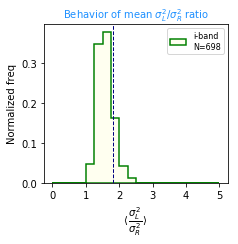

In [38]:
fig, ax = plt.subplots(figsize=(3.5, 3.5))
w = np.ones_like(ratio_z['ratio_var'].values) / len(ratio_z['ratio_var'].index)
ax.hist(ratio_z['ratio_var'], 
        edgecolor='green', 
        range=(0, 5), bins=20, weights=w,
        histtype='stepfilled',
        lw=1.5, facecolor='ivory', 
        label='i-band\nN={0}'.format(len(df_z['expnum'].unique())))
ax.axvline(cutval_z, linestyle='--', color='navy', linewidth=1)
plt.legend(fontsize=8)
ax.set_xlabel(r'$\langle\, \dfrac{\sigma^{2}_{L}}{\sigma^{2}_{R}}\, \rangle$')
ax.set_ylabel('Normalized freq')
ax.set_title(r'Behavior of mean ${\sigma^{2}_{L}}/{\sigma^{2}_{R}}$ ratio', 
             fontsize=10, color='dodgerblue')
plt.tight_layout()
plt.savefig('ratio_var_zband.png', format='png', dpi=300)

For z-band I need additional assessment, plot var(L) versus var(R)

In [39]:
z_var_left = tmp_z_left41[['expnum', 'var']].groupby(by=['expnum']).mean()
z_var_right = tmp_z_left41[['expnum', 'var']].groupby(by=['expnum']).mean()
z_var_left[:4], z_var_right[:4]

(                 var
 expnum              
 771100  3.034884e+06
 771102  1.828841e+06
 771105  1.456823e+06
 771108  3.201172e+06,                  var
 expnum              
 771100  3.034884e+06
 771102  1.828841e+06
 771105  1.456823e+06
 771108  3.201172e+06)

In [40]:
aux_nite_z = df_z.loc[df_z['expnum'].isin(exclude_z.index), 'nite'].unique()
print('Excluded {0} exposures from {1} nights: {2}'.format(len(exclude_z.index),
                                                           len(aux_nite_z), 
                                                           ','.join(map(str, aux_nite_z))))

Excluded 123 exposures from 18 nights: 20180916,20180917,20180918,20180920,20180921,20180928,20180930,20181017,20181018,20181020,20181021,20181026,20181027,20181108,20181114,20181115,20181116,20181117


Write out the expoxures to be excluded

In [41]:
outname_z = 'exclude_z_expnum.csv'
np.savetxt(outname_z, exclude_z.index, fmt='%d')

--------------------------------

# Y-band

Y-band histogram

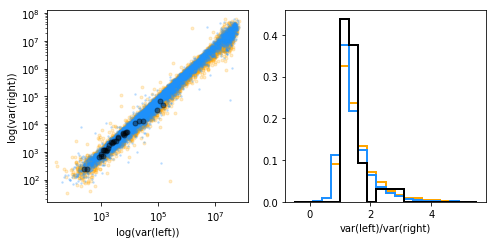

In [42]:
tmp_Y = df_Y.loc[df_Y['type'] == 'circ']
tmp_Y_left41 = tmp_Y.loc[(tmp_Y['ccdnum'] == 41) & (tmp_Y['LR'] == 'L')]
tmp_Y_right41 = tmp_Y.loc[(tmp_Y['ccdnum'] == 41) & (tmp_Y['LR'] == 'R')]
tmp_Y_left28 = tmp_Y.loc[(tmp_Y['ccdnum'] == 28) & (tmp_Y['LR'] == 'L')]
tmp_Y_right28 = tmp_Y.loc[(tmp_Y['ccdnum'] == 28) & (tmp_Y['LR'] == 'R')]
#
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))
ax[0].scatter(tmp_Y_left41['var'], tmp_Y_right41['var'], 
              marker='.', c='orange', alpha=0.2)
ax[0].scatter(tmp_Y_left28['var'], tmp_Y_right28['var'], 
              marker='.', c='dodgerblue', s=10, alpha=0.2)
# 20180910
ax[0].scatter(tmp_Y_left41.loc[tmp_Y_left41['nite'] == 20180910, 'var'], 
              tmp_Y_right41.loc[tmp_Y_right41['nite'] == 20180910, 'var'], 
              s=100, marker='.', c='k', alpha=0.4)
#
kw = {'lw':2, 'histtype':'step', 'bins':20, 'range':(-0.5, 5.5),} 
w41 = np.ones_like(tmp_Y_right41['var'].values) / tmp_Y_right41['var'].values.size
ax[1].hist(tmp_Y_left41['var'].values / tmp_Y_right41['var'].values, 
           color='orange', weights=w41, **kw)
w28 = np.ones_like(tmp_Y_right28['var'].values) / tmp_Y_right28['var'].values.size
ax[1].hist(tmp_Y_left28['var'].values / tmp_Y_right28['var'].values, 
           color='dodgerblue', weights=w28, **kw)
# 20180910 for CCD 41
w0909 = np.ones_like(tmp_Y_left41.loc[tmp_Y_left41['nite'] == 20180910, 'var'].values)
w0909 /= tmp_Y_left41.loc[tmp_Y_left41['nite'] == 20180910, 'var'].values.size
ax[1].hist(tmp_Y_left41.loc[tmp_Y_left41['nite'] == 20180910, 'var'].values / tmp_Y_right41.loc[tmp_Y_right41['nite'] == 20180910, 'var'].values,
           color='k', weights=w0909, **kw)
ax[0].set_xlabel('log(var(left))')
ax[0].set_ylabel('log(var(right))')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[1].set_xlabel('var(left)/var(right)')
plt.tight_layout()

Y-band get exposure numbers

In [43]:
aux_Y = df_Y.loc[(df_Y['ccdnum'] == 41) & (df_Y['type'] == 'circ')]
expnum_Y = aux_Y['expnum'].unique()
sel_Y = []
t0 = time.time()
for e in expnum_Y:
    df1 = aux_Y.loc[aux_Y['expnum'] == e]
    obj = df1['number'].unique()
    for n in obj:
        df2 = df1.loc[df1['number'] == n]
        if (len(df2.index) != 2):
            df2 = df2[:2]
        # Do the L/R ratio
        ratio = df2.loc[df2['LR'] == 'L', 'var'].values 
        ratio /= df2.loc[df2['LR'] == 'R', 'var'].values
        if (ratio.size != 1):
            print('ERROR', ratio)
        else:
            sel_Y.append([e, ratio[0]])
t1 = time.time()
res_Y = pd.DataFrame(sel_Y, columns=['expnum', 'ratio_var'])
print('{0:.2f} min for {1} exposures, {2} objects'.format((t1 - t0) / 60., 
                                                          expnum_Y.size, 
                                                          len(aux_Y) / 2.))

0.22 min for 503 exposures, 10291.0 objects


Y-band cut value

In [44]:
cutval_Y = 2.0

Y-band group and get mean ratio per exposure. Print some exposures to ds9 them

In [45]:
ratio_Y = res_Y.groupby(by='expnum').mean()
#
exclude_Y = ratio_Y.loc[ratio_Y['ratio_var'] > cutval_Y]
print(len(df_Y['expnum'].unique()), len(exclude_Y.index), 
      '\n', exclude_Y.sort_values('ratio_var')[:10])

503 41 
         ratio_var
expnum           
776016   2.003747
795290   2.005236
786306   2.009008
776014   2.012232
786245   2.027022
785450   2.031204
786262   2.032012
786253   2.075736
786188   2.077781
786185   2.084005


Histogram to check distribution adn see if cutval is appropiate

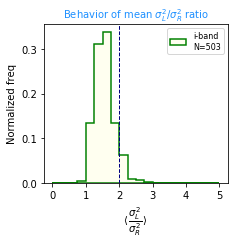

In [46]:
fig, ax = plt.subplots(figsize=(3.5, 3.5))
w = np.ones_like(ratio_Y['ratio_var'].values) / len(ratio_Y['ratio_var'].index)
ax.hist(ratio_Y['ratio_var'], 
        edgecolor='green', 
        range=(0, 5), bins=20, weights=w,
        histtype='stepfilled',
        lw=1.5, facecolor='ivory', 
        label='i-band\nN={0}'.format(len(df_Y['expnum'].unique())))
ax.axvline(cutval_Y, linestyle='--', color='navy', linewidth=1)
plt.legend(fontsize=8)
ax.set_xlabel(r'$\langle\, \dfrac{\sigma^{2}_{L}}{\sigma^{2}_{R}}\, \rangle$')
ax.set_ylabel('Normalized freq')
ax.set_title(r'Behavior of mean ${\sigma^{2}_{L}}/{\sigma^{2}_{R}}$ ratio', 
             fontsize=10, color='dodgerblue')
plt.tight_layout()
plt.savefig('ratio_var_Yband.png', format='png', dpi=300)

For Y-band I need additional assessment, plot var(L) versus var(R)

In [47]:
Y_var_left = tmp_Y_left41[['expnum', 'var']].groupby(by=['expnum']).mean()
Y_var_right = tmp_Y_left41[['expnum', 'var']].groupby(by=['expnum']).mean()
Y_var_left[:4], Y_var_right[:4]

(                 var
 expnum              
 771925   4693.930450
 771926  20824.569305
 771927   2252.263184
 771928   6010.522266,                  var
 expnum              
 771925   4693.930450
 771926  20824.569305
 771927   2252.263184
 771928   6010.522266)

In [48]:
aux_nite_Y = df_Y.loc[df_Y['expnum'].isin(exclude_Y.index), 'nite'].unique()
print('Excluded {0} exposures from {1} nights: {2}'.format(len(exclude_Y.index),
                                                           len(aux_nite_Y), 
                                                           ','.join(map(str, aux_nite_Y))))

Excluded 41 exposures from 9 nights: 20180910,20180920,20180921,20181019,20181020,20181021,20181026,20181027,20181117


Write out the expoxures to be excluded

In [49]:
outname_Y = 'exclude_Y_expnum.csv'
np.savetxt(outname_Y, exclude_Y.index, fmt='%d')

-----------------

In [50]:
np.sort(aux_nite_r)

array([20180908, 20180909, 20180910, 20180913, 20180914, 20180917,
       20181019, 20181027, 20181105, 20181106, 20181108, 20181114,
       20181116])

In [51]:
np.sort(aux_nite_g) , [20180909]

array([20180908, 20180910, 20180914, 20180916, 20180917, 20180928,
       20181009, 20181018, 20181019, 20181027, 20181105, 20181106,
       20181107, 20181108, 20181114, 20181115, 20181116])

In [52]:
np.sort(aux_nite_i) , [20180909]

array([20180908, 20180910, 20180913, 20180914, 20180915, 20180916,
       20180920, 20180921, 20180928, 20180930, 20181009, 20181017,
       20181019, 20181020, 20181026, 20181027, 20181105, 20181106,
       20181107, 20181108, 20181114, 20181115, 20181116, 20181117])

In [53]:
np.sort(aux_nite_z) , [20180908, 20180909, 20180910]

(array([20180916, 20180917, 20180918, 20180920, 20180921, 20180928,
        20180930, 20181017, 20181018, 20181020, 20181021, 20181026,
        20181027, 20181108, 20181114, 20181115, 20181116, 20181117]),
 [20180908, 20180909, 20180910])

In [54]:
np.sort(aux_nite_Y)

array([20180910, 20180920, 20180921, 20181019, 20181020, 20181021,
       20181026, 20181027, 20181117])